In [1]:
import requests
import folium
from bs4 import BeautifulSoup
import pandas as pd
import matplotlib.pyplot as plt
import re

data = pd.read_csv("AIS_2020_01_01.csv") 
data

,MMSI,BaseDateTime,LAT,LON,SOG,COG,Heading,VesselName,IMO,CallSign,VesselType,Status,Length,Width,Draft,Cargo,TransceiverClass
0,538008468,2020-01-01T00:00:00,38.25802,-76.29487,14.9,338.6,337.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,A
1,368120510,2020-01-01T00:00:00,27.58610,-82.75991,0.0,58.6,511.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,A
2,368063930,2020-01-01T00:00:00,40.71045,-73.97588,11.2,208.9,207.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,A
3,368106220,2020-01-01T00:00:00,38.53932,-90.25523,0.2,161.8,31.0,NaN,NaN,NaN,NaN,15.0,NaN,NaN,NaN,NaN,A
4,367336180,2020-01-01T00:00:00,56.02945,-132.68705,9.0,325.5,511.0,NaN,NaN,NaN,NaN,15.0,NaN,NaN,NaN,NaN,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7040384,367867000,2020-01-01T20:50:18,13.42872,144.66353,0.0,170.8,225.0,RAPPAHANNOCK,IMO8822466,NRAP,80.0,5.0,193.0,29.0,NaN,NaN,A
7040385,367867000,2020-01-01T22:14:17,13.42875,144.66357,0.0,170.8,225.0,RAPPAHANNOCK,IMO8822466,NRAP,80.0,5.0,193.0,29.0,NaN,NaN,A
7040386,367867000,2020-01-01T22:17:18,13.42869,144.66356,0.0,170.8,225.0,RAPPAHANNOCK,IMO8822466,NRAP,80.0,5.0,193.0,29.0,NaN,NaN,A
7040387,367867000,2020-01-01T23:35:17,13.42879,144.66360,0.0,170.8,224.0,RAPPAHANNOCK,IMO8822466,NRAP,80.0,5.0,193.0,29.0,NaN,NaN,A


In [5]:
# Count the Number of IMO number we have in theb list to see how many
# ships are identify with IMO number. If not, we can go by MMSI


Count_type = data['IMO'].value_counts()

# Print the result
#Count_type

# Convert Count_type in a DataFrame
count_type_df = Count_type.reset_index()
count_type_df.columns = ['IMO', 'Count']

# Print new Count type df DataFrame
count_type_df

,IMO,Count
0,IMO0000000,640225
1,IMO0000001,2101
2,IMO7413218,1278
3,IMO8716631,1268
4,IMO8845365,1264
...,...,...
4080,IMO8803496,1
4081,IMO9466245,1
4082,IMO9469986,1
4083,IMO1008619,1


In [6]:
#List of Vessel Names

visual_df = data[['LAT', 'LON', 'VesselName']]
#visual_df.head(5)

#Delete those VesselName with NaN Values. (Cleaning process) 
# Check later if these NaN vessels has coordinates and MMSI or IMO to identify them

clean_df = visual_df.dropna()

#Obtain just the first 20 ships on the Clean List
small_df= clean_df.iloc[:20]
small_df

,LAT,LON,VesselName
6,34.22099,-76.31654,GENESIS VIGILANT
15,48.40006,-122.49535,GRAND SLAM
17,49.30655,-123.07855,SEASPAN CAREEN
20,30.25460,-88.55838,T CLAUDE DEVALL
21,26.85006,-97.46643,W C BINION JR
22,32.31175,-117.53433,NYK CLARA
23,30.16622,-90.99981,JOE B WARD
24,18.19367,-65.00856,EPIC CALEDONIA
25,30.07814,-90.90360,ANARITA
26,27.83485,-97.41125,DEBBIE B


In [7]:
#test Create Map in another way

mtst = folium.Map(location=[small_df['LAT'].mean(), small_df['LON'].mean()], zoom_start=5)

# Añadir marcadores al mapa
for i, row in small_df.iterrows():
    folium.Marker(location=[row['LAT'], row['LON']], popup=row['VesselName']).add_to(mtst)

folium.LayerControl().add_to(mtst)

# Mostrar el mapa
mtst

In [10]:
mo = folium.Map([30.25802, -110.29487], tiles="Cartodb dark_matter", zoom_start=3)

zuri = data[data["VesselName"] == 'ZYANA K']
trail = zuri[['LAT', 'LON']]
trail.info()


trail_coordinates = []
for i, row in enumerate(trail.values):
        lat = row[0]
        lon = row[1] 
        tup = (lat,lon)
        trail_coordinates.append(tup)

folium.PolyLine(trail_coordinates, tooltip="Pathway of Zuri").add_to(mo)
mo

<class 'pandas.core.frame.DataFrame'>
Index: 653 entries, 3273 to 7030309
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   LAT     653 non-null    float64
 1   LON     653 non-null    float64
dtypes: float64(2)
memory usage: 15.3 KB


In [18]:
#Same process as IMO number
Count_mmsi = data['MMSI'].value_counts()
# Print the result
#print(Count_mmsi)

# Convert Count_type in a DataFrame
count_mmsi_df = Count_mmsi.reset_index()
count_mmsi_df.columns = ['MMSI', 'Count']
# Print new Count type df DataFrame
#count_mmsi_df

#Read ITU MID list (3 first digits of MMSI)
MID_df = pd.read_excel("ITU MID Data.xlsx")

# Create a dictionary with MID & Country relationship
mapeo_paises = dict(zip(MID_df['Digit'], MID_df['Allocated to']))

# Function to obtain the Country of the Vessel from the MMSI and the MID list
def obtener_pais(mmsi):
    mid = int(str(mmsi)[:3])
    return mapeo_paises.get(mid, "Unknown")

# Apply this new function and create a 'Country' column
count_mmsi_df['Country']= count_mmsi_df['MMSI'].apply(obtener_pais)
#count_mmsi_df

#Arrange better the table with Country &  number of Vessels with that MMSI (Flag)
count_per_country_df = count_mmsi_df.groupby('Country')['MMSI'].count().reset_index()
count_per_country_df


,Country,MMSI
0,Albania (Republic of),1
1,Antigua and Barbuda,33
2,Australia,8
3,Austria,1
4,Bahamas (Commonwealth of the),123
...,...,...
78,United States of America,11015
79,United States of America - Alaska (State of),67
80,Unknown,61
81,Vanuatu (Republic of),23


In [21]:
#Cleaning Process: Get the list of the first 8 Countries and simplify the name of the Country
top_8_countries = count_per_country_df.nlargest(8, 'MMSI')
top_8_countries['Country'] = top_8_countries['Country'].apply(lambda x: re.sub(r'\([^()]*\)', '', x).strip())
top_8_countries['Country'] = top_8_countries['Country'].str.replace('United Kingdom of Great Britain and Northern Ireland - Cayman Islands', 'Cayman Islands')
pd.set_option('display.max_colwidth', None)
top_8_countries

,Country,MMSI
78,United States of America,11015
11,Canada,713
41,Marshall Islands,285
50,Panama,273
73,Cayman Islands,222
38,Liberia,211
4,Bahamas,123
60,Singapore,120


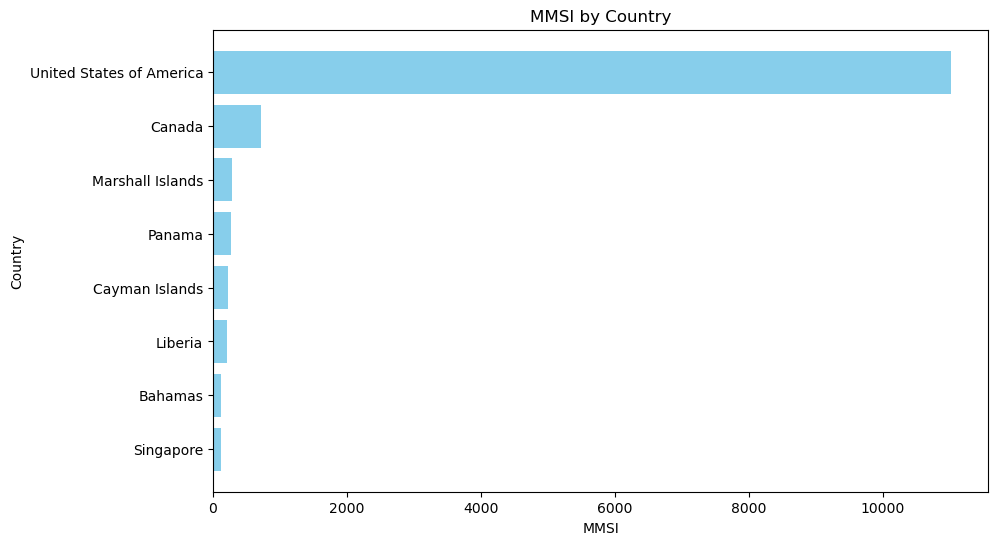

In [23]:
#Visualize these 8 Countries in a Bar Chart

top_8_countries = top_8_countries.sort_values(by='MMSI', ascending=False)

plt.figure(figsize=(10, 6))
plt.barh(top_8_countries['Country'], top_8_countries['MMSI'], color='skyblue')
plt.xlabel('MMSI')
plt.ylabel('Country')
plt.title('MMSI by Country')
plt.gca().invert_yaxis()  # Command to make the Chart horizontally
plt.show()

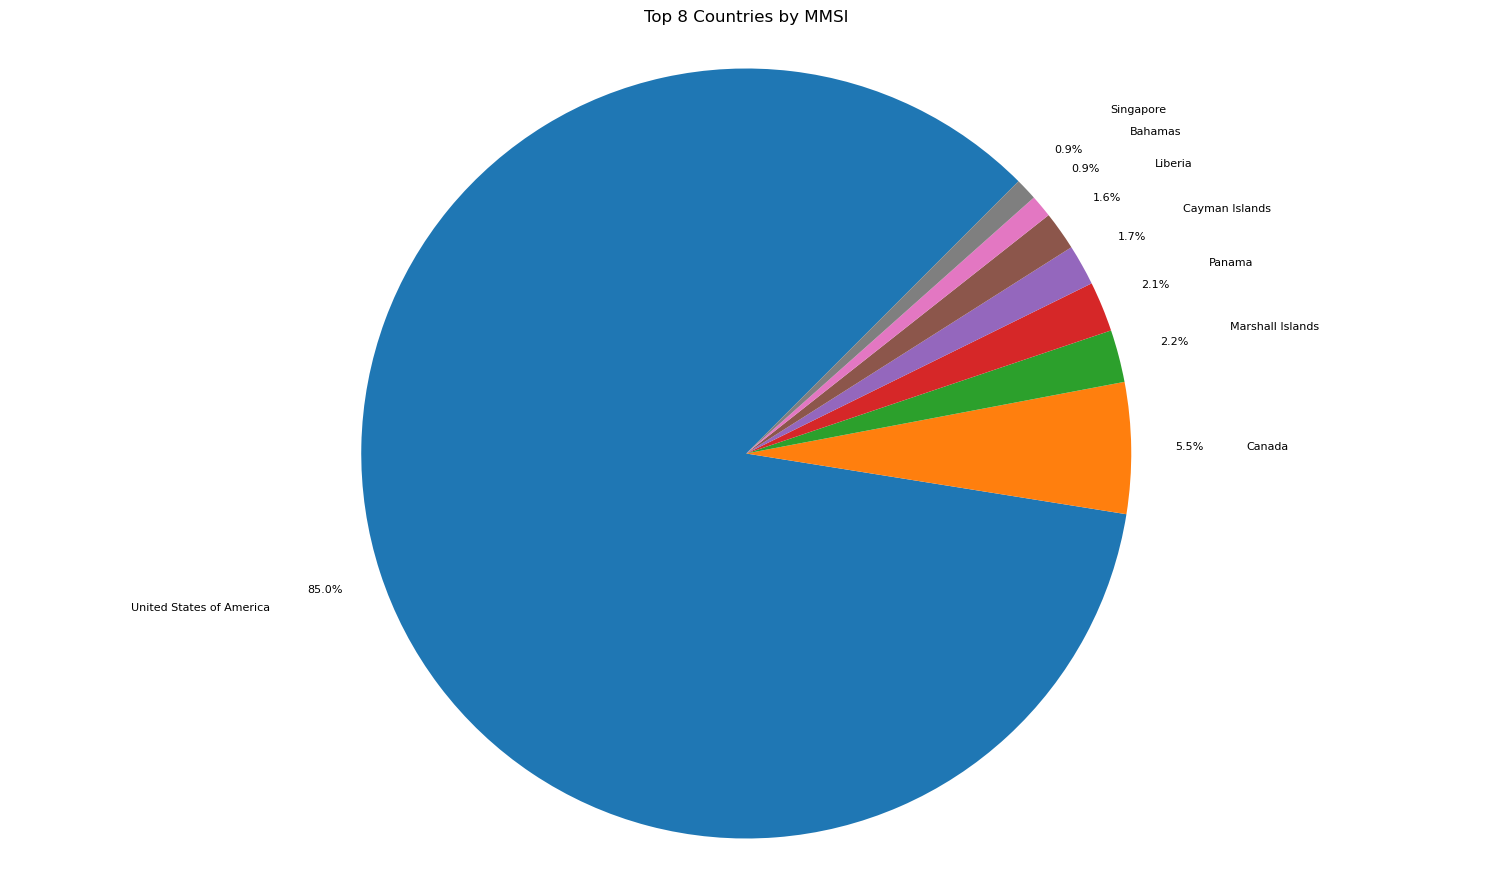

In [24]:
# Visualize in a Pie Chart

top_8_countries.plot.pie(y='MMSI',
                         labels=top_8_countries['Country'],
                         autopct='%1.1f%%',
                         figsize = (19,11),
                         title = 'Top 8 Countries by MMSI',
                         rotatelabels =False,
                         pctdistance= 1.15,
                         labeldistance= 1.3,
                         fontsize = 8,
                         legend = False,
                         startangle=45)

plt.axis('equal') 
plt.ylabel('')  # Delete Y Label from Y Axes
plt.show()

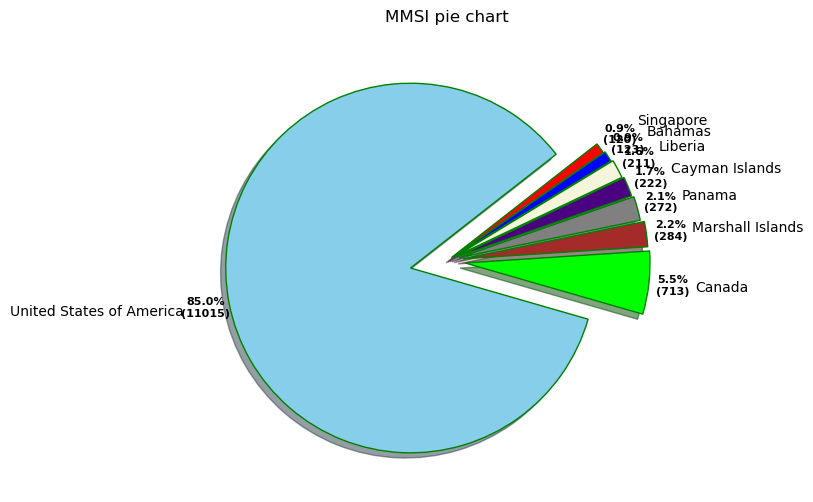

In [25]:
# Do it nicer , creating explode data with a Pie chart (experiment)
import numpy as np

explode = (0.2, 0.1, 0.09, 0.07, 0.06, 0.05, 0.04, 0.03)

# Creating color parameters
colors = ("skyblue", "lime", "brown", "grey", "indigo", "beige", "blue", "red")

# Wedge properties
wp = {'linewidth': 1, 'edgecolor': "green"}

# Function for labels
def func(pct, allvalues):
    absolute = int(pct / 100.*np.sum(allvalues))
    return "{:.1f}%\n({:d})".format(pct, absolute)

# Create plot
fig, ax = plt.subplots(figsize=(8, 6))
wedges, texts, autotexts = ax.pie(top_8_countries['MMSI'],
                                  autopct=lambda pct: func(pct, top_8_countries['MMSI']),
                                  explode=explode,
                                  labels=top_8_countries['Country'],
                                  shadow=True,
                                  colors=colors,
                                  pctdistance= 1.13,
                                  labeldistance= 1.25,
                                  startangle=38,
                                  wedgeprops=wp,
                                  textprops=dict(color="black"))

# Add Legend
#ax.legend(wedges, top_8_countries['Country'],
          #title="MMSI by Countries",
          #loc="center left",
          #bbox_to_anchor=(1, 0, 0.5, 1))

plt.setp(autotexts, size=8, weight="bold")
ax.set_title("MMSI pie chart")

# Graph result
plt.show()

In [26]:
# Here we want to create independent "box" for each Vessel or, in our case, for each different MMSI we have
# Doing so, we can identify a vessel with a number and make it easier when it comes to analyzing

from tqdm import tqdm #Displaying progress bars.

# Get unique MMSI values
SINGLE_VESSEL_id = pd.unique(data['MMSI'])

# Dictionary to store vessel data. Here each vessel will be numbered like V[i]
Vs = {}

# Iterate through unique MMSI values
for i in tqdm(range(0, len(SINGLE_VESSEL_id))):
    # Extract data for the current MMSI value
    Vs[i] = data[data['MMSI'] == SINGLE_VESSEL_id[i]]

    # Reset the index of the DataFrame
    Vs[i].reset_index(inplace=True, drop=True)

#Print the entire list
#Vs

100%|██████████| 14044/14044 [02:22<00:00, 98.80it/s] 


In [29]:
#As an example, we will take V[0], being the Vessel "SM New Orleans", with MMSI 538008468
# We will use this ship as a perfect target to cross check the info obtain on ShipInfo Website, section "S", page 914
#The location of the website has been found previously to make easier the exercise. 
#because memory and power of our device, we are limited to small search
# Bewlow we can see all the activity of this ship during 1st january 2020 in US waters
Vs[0]

,MMSI,BaseDateTime,LAT,LON,SOG,COG,Heading,VesselName,IMO,CallSign,VesselType,Status,Length,Width,Draft,Cargo,TransceiverClass
0,538008468,2020-01-01T00:00:00,38.25802,-76.29487,14.9,338.6,337.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,A
1,538008468,2020-01-01T00:01:06,38.26228,-76.29696,14.9,338.8,337.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,A
2,538008468,2020-01-01T00:02:11,38.26648,-76.29904,14.9,338.7,337.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,A
3,538008468,2020-01-01T00:03:18,38.27081,-76.30117,14.9,338.8,337.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,A
4,538008468,2020-01-01T00:04:24,38.27500,-76.30323,14.8,338.8,337.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
600,538008468,2020-01-01T22:22:00,39.22176,-76.57668,0.0,238.4,275.0,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,A
601,538008468,2020-01-01T22:49:00,39.22176,-76.57665,0.0,201.3,275.0,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,A
602,538008468,2020-01-01T23:07:00,39.22176,-76.57665,0.0,173.7,275.0,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,A
603,538008468,2020-01-01T23:13:00,39.22172,-76.57666,0.0,173.7,275.0,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,A


In [105]:
#Here we implement our exercise done in ShipInfo Repository to webscapping the web and get info from the vessels listed.
#As we said above, we will force the code to catch only the web pages where we know our vessel should be on ShipInfo page.
#Our inital target, "SM New Orleans" works fine with "pages" vector from 912 to 915 pages. Considering this point, it's been
# decided to see if the code works with more ships at the same time in our search, so, looking at the first list of Names, we realized we have many
# ships from the Canadian Seaspan. These vessels are located in "page" 449. Having said that, we search from 448 to 450:
 

import pandas as pd
import numpy as np
import requests
from bs4 import BeautifulSoup
from time import sleep
from random import randint


#declaring the list of empty variables, So that we can append the data overall

ship_name = []
IMO = []


#creating an array of values and passing it in the url for dynamic webpages. We choose from 912 to 915 just to get the page 914 on purpose
pages = np.arange(448,450,1)

#the whole core of the script
for page in pages:
    page = requests.get("https://shipinfo.net/vessels_list.php?letter=S&page=" +str(page))
    soup = BeautifulSoup(page.text, 'html.parser')
    ship_data1 = soup.findAll('div', attrs = {'class': 'item'})
    ship_data = soup.findAll('div', attrs = {'class': 'description'})

    sleep(randint(2,8))
    for stored in ship_data:
        imo_d = stored.text
        IMO.append(imo_d)

    for store in ship_data1:
        name = store.a.text
        ship_name.append(name)
        
       
#creating a dataframe 
ship_list = pd.DataFrame({ "Ship Name": ship_name, 
                           #"IMO of Ship" : IMO, 
                          })

IMO_list = pd.DataFrame({# "Ship Name": ship_name, 
                           "IMO of Ship" : IMO, 
                          })

# Configurar pandas para mostrar todas las filas y columnas
pd.set_option('display.max_rows', None)  # Mostrar todas las filas
pd.set_option('display.max_columns', None)  # Mostrar todas las columnas



In [106]:
IMO_list

,IMO of Ship
0,"type: Chemical Oil Products Tanker\n, IMO: 9629550; MMSI: 229319000"
1,IMO: 0; MMSI: 211684280
2,IMO: 0; MMSI: 211812100
3,IMO: 0; MMSI: 338236002
4,IMO: 0; MMSI: 244170902
5,IMO: 0; MMSI: 338369616
6,IMO: 0; MMSI: 316034156
7,IMO: 0; MMSI: 232017670
8,IMO: 0; MMSI: 232021188
9,IMO: 0; MMSI: 235006472


In [107]:
ship_list

,Ship Name
0,"""Seasalvia"" vessel position"
1,"""SEASAR"" vessel position"
2,"""SEASAULT"" vessel position"
3,"""SEASAW"" vessel position"
4,"""SEASCAPE"" vessel position"
5,"""SEASCAPE"" vessel position"
6,"""SEASCAPE"" vessel position"
7,"""SEASCAPE"" vessel position"
8,"""SEASCAPE"" vessel position"
9,"""SEASCAPE"" vessel position"


In [108]:
ship_clean = ship_list.replace('', pd.NA).dropna(axis=0, how='all')
ship_clean.reset_index(drop=True, inplace=True)

ship_clean

,Ship Name
0,"""Seasalvia"" vessel position"
1,"""SEASAR"" vessel position"
2,"""SEASAULT"" vessel position"
3,"""SEASAW"" vessel position"
4,"""SEASCAPE"" vessel position"
5,"""SEASCAPE"" vessel position"
6,"""SEASCAPE"" vessel position"
7,"""SEASCAPE"" vessel position"
8,"""SEASCAPE"" vessel position"
9,"""SEASCAPE"" vessel position"


In [109]:
result = pd.concat([ship_clean['Ship Name'], IMO_list['IMO of Ship']], axis=1)

result['Ship Name'] = result['Ship Name'].str.replace("'", "").str.replace('"', '').str.replace(" vessel position", "")

result[['IMO', 'MMSI']] = result['IMO of Ship'].str.split('; MMSI: ', expand=True)


result.drop(columns=['IMO of Ship'], inplace=True)

result

,Ship Name,IMO,MMSI
0,Seasalvia,"type: Chemical Oil Products Tanker\n, IMO: 9629550",229319000
1,SEASAR,IMO: 0,211684280
2,SEASAULT,IMO: 0,211812100
3,SEASAW,IMO: 0,338236002
4,SEASCAPE,IMO: 0,244170902
5,SEASCAPE,IMO: 0,338369616
6,SEASCAPE,IMO: 0,316034156
7,SEASCAPE,IMO: 0,232017670
8,SEASCAPE,IMO: 0,232021188
9,SEASCAPE,IMO: 0,235006472


In [110]:
# Function to extract IMO number and Type from IMO column
def extract_type_and_imonum(imo_str):
    if 'IMO' in imo_str:
        parts = imo_str.split(',')
        imo_number = parts[-1].strip().split(': ')[-1]
        type_ = parts[0].split(': ')[-1].strip()
        return type_, imo_number
    else:
        return '', ''

# Apply the function to extract Type and IMO number
result['Type'], result['IMO number'] = zip(*result['IMO'].apply(extract_type_and_imonum))

# Drop the original 'IMO' column
result.drop(columns=['IMO'], inplace=True)

result

,Ship Name,MMSI,Type,IMO number
0,Seasalvia,229319000,Chemical Oil Products Tanker,9629550
1,SEASAR,211684280,0,0
2,SEASAULT,211812100,0,0
3,SEASAW,338236002,0,0
4,SEASCAPE,244170902,0,0
5,SEASCAPE,338369616,0,0
6,SEASCAPE,316034156,0,0
7,SEASCAPE,232017670,0,0
8,SEASCAPE,232021188,0,0
9,SEASCAPE,235006472,0,0


In [111]:
#import pandas as pd
#from tqdm import tqdm

# Ensure MMSI columns are of the same data type
result['MMSI'] = result['MMSI'].astype(str)

# Create an empty set to store matching MMSI values
matching_mmsi = set()

# Create an empty dictionary to store matching MMSI values along with corresponding indices i
matching_vessel_indices = {}

# Create an empty list to store matching DataFrames
matching_result_dfs = []

# Iterate through each vessel DataFrame in Vs
for key, vessel_df in tqdm(Vs.items()):
    # Extract the MMSI value of the current vessel DataFrame
    current_mmsi = str(vessel_df['MMSI'].iloc[0])  # Convert to string for consistent comparison
    
    # Check if the MMSI value exists in the "result" DataFrame
    if current_mmsi in result['MMSI'].values:
        # If it exists, add the MMSI value to the matching_mmsi set
        matching_mmsi.add(current_mmsi)
        
        # Store the index i along with the matching MMSI value
        matching_vessel_indices[current_mmsi] = key
        
        # Append the matching DataFrame from the "result" DataFrame to matching_result_dfs
        matching_result_dfs.append(result[result['MMSI'] == current_mmsi])

# Create a DataFrame containing unique matching MMSI values
matching_mmsi_df = pd.DataFrame({'MMSI': list(matching_mmsi)})

# Concatenate the matching DataFrames from the "result" DataFrame
matching_result_rows = pd.concat(matching_result_dfs, ignore_index=True)

# Print the DataFrame containing unique matching MMSI values
print("DataFrame containing unique matching MMSI values:")
print(matching_mmsi_df)

# Print the matching rows from the "result" DataFrame
print("\nMatching rows from the 'result' DataFrame:")
print(matching_result_rows)

# Print the dictionary containing matching MMSI values along with corresponding indices i
print("\nIndices of matching Vs[i] entries:")
print(matching_vessel_indices)


100%|██████████| 14044/14044 [00:00<00:00, 17711.56it/s]

DataFrame containing unique matching MMSI values:
        MMSI
0  316003666
1  316004500
2  316003900
3  316003663
4  316003667
5  316003659
6  316020869
7  316037994

Matching rows from the 'result' DataFrame:
            Ship Name       MMSI     Type IMO number
0      SEASPAN CAREEN  316037994   801801     801801
1     SEASPAN CORSAIR  316003663  7434779    7434779
2     SEASPAN KESTREL  316020869      ABS    9623130
3      SEASPAN FALCON  316003667      Tug    9072393
4     SEASPAN CUTLASS  316003666  7434781    7434781
5    SEASPAN CAVALIER  316003659  7434808    7434808
6  SEASPAN CHALLENGER  316003900      Tug    7017789
7  SEASPAN CHALLENGER  316003900      Tug    7017789
8     SEASPAN MONARCH  316004500      Tug    7636028

Indices of matching Vs[i] entries:
{'316037994': 17, '316003663': 29, '316020869': 2227, '316003667': 3002, '316003666': 3082, '316003659': 3556, '316003900': 7465, '316004500': 9763}


In [112]:
# This part is just to visualize the result as a dataFrame 
# Convert the dictionary matching_vessel_indices to a DataFrame
matching_vessel_indices_df = pd.DataFrame.from_dict(matching_vessel_indices, orient='index', columns=['V[i]']).reset_index()

# Rename the columns for clarity
matching_vessel_indices_df.columns = ['MMSI', 'V[i]']

# Print the DataFrame containing indices of matching Vs[i] entries
print("\nDataFrame containing indices of matching Vs[i] entries:")
matching_vessel_indices_df



DataFrame containing indices of matching Vs[i] entries:


,MMSI,V[i]
0,316037994,17
1,316003663,29
2,316020869,2227
3,316003667,3002
4,316003666,3082
5,316003659,3556
6,316003900,7465
7,316004500,9763


In [113]:
# Merge matching_result_rows with matching_vessel_indices_df on the "MMSI" column
matching_result_rows1 = pd.merge(matching_result_rows, matching_vessel_indices_df, on='MMSI', how='left')

# Print the updated matching_result_rows DataFrame
print("\nUpdated matching_result_rows DataFrame with indices of matching Vs[i] entries:")
matching_result_rows1



Updated matching_result_rows DataFrame with indices of matching Vs[i] entries:


,Ship Name,MMSI,Type,IMO number,V[i]
0,SEASPAN CAREEN,316037994,801801,801801,17
1,SEASPAN CORSAIR,316003663,7434779,7434779,29
2,SEASPAN KESTREL,316020869,ABS,9623130,2227
3,SEASPAN FALCON,316003667,Tug,9072393,3002
4,SEASPAN CUTLASS,316003666,7434781,7434781,3082
5,SEASPAN CAVALIER,316003659,7434808,7434808,3556
6,SEASPAN CHALLENGER,316003900,Tug,7017789,7465
7,SEASPAN CHALLENGER,316003900,Tug,7017789,7465
8,SEASPAN MONARCH,316004500,Tug,7636028,9763


In [ ]:
# This project provides a tool to obtain details it cannot be seen in AIS data when some of the table, mainly the static part
# (Vessel name - IMO - CallSign - etc) is lost or we have NaN value. The inspiring point to create this code is the fact that 
# the MMSI is changeable and although the number of vessels exchanged flags is small (second hand market most probably), 
# MSI cannot be the value to identify the ship targeted. For this purpose it is better to look at IMO number (Permanent value).
# The idea behind is to cross check the MMSI with the IMO associated and get the IMO number from another source of information. 
# We choose ShipInfo as a reference, but it could be another one, for example, Vessel Finder ( here we can extract via web Scraping
# techniques the GT and DWT, crucial parameters to classify vessels in subcategories like bulk carriers in Supramax, Panamax etc)
# Another source of info could be "DNV Register List" (website link depends on a DNV number, specific for any vessel), also
# Q88 website (here we can extract Society of Classification and Owner) , Lloyds Register list etc